In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>Feature Engineering and Visualization with WC Data</h1>

Fifa World Cup 2022: Complete Dataset

https://www.kaggle.com/datasets/die9origephit/fifa-world-cup-2022-complete-dataset

# Loading Dataset and Packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings


sns.set()
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/Fifa World Cup 2022: Complete Dataset/Fifa_world_cup_matches.csv")

#Fixing Column Names
data.rename(columns = {'attempts inside the penalty area  team2' : 'attempts inside the penalty area team2',
                       'attempts outside the penalty area  team1': 'attempts outside the penalty area team1',
                       'attempts outside the penalty area  team2': 'attempts outside the penalty area team2',
                       'completed line breaksteam1' : 'completed line breaks team1',
                       'completed defensive line breaksteam1' : 'completed defensive line breaks team1',
                       }, inplace = True)

#Changing Objects into Numbers
for k in ("possession team1", "possession team2", "possession in contest"):
  for i in range(len(data)):
    value = data.loc[i, k]
    data.loc[i, k] = int(value[:-1]) / 100
  data[k].astype("float")

data.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,0.42,0.5,0.08,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,0.72,0.19,0.09,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,0.44,0.45,0.11,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,0.51,0.39,0.1,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,0.64,0.24,0.12,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [ ]:
#Checking if there are any null values
data.isnull().any().any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

In [ ]:
#Adding Win/Lose Columns
data["result team1"] = np.NaN
data["result team2"] = np.NaN

for i in range(len(data)):
  team1_score = data.loc[i,"number of goals team1"]
  team2_score = data.loc[i,"number of goals team2"]
  if team1_score > team2_score:
    data.loc[i, "result team1"] = 1
    data.loc[i, "result team2"] = -1
  elif team1_score < team2_score:
    data.loc[i, "result team1"] = -1
    data.loc[i, "result team2"] = 1
  else:
    data.loc[i, "result team1"] = 0
    data.loc[i, "result team2"] = 0

# Defining New Functions

In [ ]:
#Defining new functions
def find_cols(team):
  cols = []
  for col_name in data.columns:
    if team in col_name:
      cols.append(col_name)
  return cols

def change_cols(dataname, team, name):
  dfdf = dataname.copy()
  for col_name in dfdf.columns:
    if team in col_name:
      new_colname = col_name.replace(team, "")
      dfdf.rename(columns = {col_name : new_colname}, inplace = True)
    dfdf.rename(columns = {"" : "country"}, inplace = True)
  return dfdf


def country(name, show_all = True):
  result = data[(data.team1 == name) | (data.team2 == name)]

  if show_all == True:
    return result

  elif show_all != True:
    df = pd.DataFrame()
    for i in result.index:
      if result.loc[i, "team1"] == name:
        df1 = result.loc[i, find_cols("team1")].to_frame().transpose()
        df1 = change_cols(df1, "team1", name)
        df = pd.concat([df, df1])

      elif result.loc[i, "team2"] == name:
        df2 = result.loc[i, find_cols("team2")].to_frame().transpose()
        df2 = change_cols(df2, "team2", name)
        df = pd.concat([df, df2])

    return df

def category(cat):
  return data[data.category == cat]

Example of new functions

In [ ]:
country("KOREA REPUBLIC")

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,result team1,result team2
13,URUGUAY,KOREA REPUBLIC,0.49,0.38,0.13,0,0,24 NOV 2022,14 : 00,Group H,...,6,10,0,0,65,54,240,231,0.0,0.0
29,KOREA REPUBLIC,GHANA,0.53,0.32,0.15,2,3,28 NOV 2022,14 : 00,Group H,...,8,21,0,0,53,75,220,324,-1.0,1.0
45,KOREA REPUBLIC,PORTUGAL,0.34,0.55,0.11,2,1,02 DEC 2022,16 : 00,Group H,...,14,12,0,0,54,50,359,233,1.0,-1.0
53,BRAZIL,KOREA REPUBLIC,0.47,0.44,0.09,4,1,05 DEC 2022,20 : 00,Round of 16,...,10,18,0,0,73,81,310,329,1.0,-1.0


In [ ]:
country("KOREA REPUBLIC", show_all = False)

,country,possession,number of goals,total attempts,conceded,goal inside the penalty area,goal outside the penalty area,assists,on target attempts,off target attempts,...,crosses completed,switches of play completed,corners,free kicks,penalties scored,goal preventions,own goals,forced turnovers,defensive pressures applied,result
13,KOREA REPUBLIC,0.38,0,6,0,0,0,0,0,5,...,3,9,3,8,0,10,0,54,231,0.0
29,KOREA REPUBLIC,0.53,2,21,3,2,0,2,6,8,...,16,16,12,10,0,8,0,53,220,-1.0
45,KOREA REPUBLIC,0.34,2,12,1,2,0,1,6,4,...,3,9,5,15,0,14,0,54,359,1.0
53,KOREA REPUBLIC,0.44,1,10,4,0,1,0,6,2,...,1,13,4,8,0,18,0,81,329,-1.0


In [ ]:
category("Semi-final")

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2,result team1,result team2
60,ARGENTINA,CROATIA,0.34,0.54,0.12,3,0,13 DEC 2022,20 : 00,Semi-final,...,12,10,0,0,85,63,321,260,1.0,-1.0
61,FRANCE,MOROCCO,0.34,0.55,0.11,2,0,14 DEC 2022,20 : 00,Semi-final,...,13,14,0,0,72,47,328,218,1.0,-1.0


# Average Performance among all Teams

In [ ]:
nations = list(data.team1.unique())
result = pd.DataFrame()

for nation in nations:
  gb = country(nation, show_all = False).groupby("country").mean()
  result = pd.concat([result, gb])

result.mean()

#In average,
#each team owned possession 43.52% each game,
#attempted 10.97 times and scored 1.24 goals each game, which makes the success rate about 11.33%,
#scored inside the penalty area 1.13 goals and outside the penalty area 0.09 goals,
#0.88 goals were assisted,
#made on target attempts 3.81 times, which makes the on-target-attempt rate about 34.73%,
#6.76 attempts were made inside the penalty area, and 4.21 attempts were made outside the penalty area,
#each team mostly made use of left/right channels (the edge of the field),
#558.81 offers were made, 122.07 inbehind offers, 218.58 inbetween offers, and 218.15 infront offers
#10.64 receptions between midfield and defensive lines were made,
#169.31 line breaks were attempted, and 64.13% were completed
# ... and so on

possession                                            0.435158
number of goals                                       1.243080
total attempts                                       10.970461
conceded                                              1.434375
goal inside the penalty area                          1.130952
goal outside the penalty area                         0.093899
assists                                               0.875149
on target attempts                                    3.817783
off target attempts                                   4.838839
attempts inside the penalty area                      6.761830
attempts outside the penalty area                     4.208631
left channel                                         13.256920
left inside channel                                   4.577976
central channel                                       4.865848
right inside channel                                  4.556250
right channel                                        11

In [ ]:
nations = list(data.team1.unique())
result = pd.DataFrame()

for nation in nations:
  gb = country(nation, show_all = False).groupby("country").mean()
  result = pd.concat([result, gb])

result

,possession,number of goals,total attempts,conceded,goal inside the penalty area,goal outside the penalty area,assists,on target attempts,off target attempts,attempts inside the penalty area,...,crosses completed,switches of play completed,corners,free kicks,penalties scored,goal preventions,own goals,forced turnovers,defensive pressures applied,result
country,,,,,,,,,,,,,,,,,,,,,
QATAR,0.406667,0.333333,7.000000,2.333333,0.333333,0.000000,0.333333,2.000000,4.666667,2.666667,...,4.333333,10.333333,3.000000,19.333333,0.000000,10.666667,0.000000,57.000000,295.333333,-1.000000
ENGLAND,0.578000,2.600000,12.000000,0.800000,2.400000,0.200000,2.200000,5.400000,4.200000,8.400000,...,6.000000,8.600000,5.000000,14.800000,0.200000,9.000000,0.000000,56.000000,199.000000,0.400000
SENEGAL,0.397500,1.250000,12.750000,1.750000,1.250000,0.000000,0.500000,3.500000,7.000000,8.000000,...,5.250000,7.750000,5.500000,15.750000,0.250000,9.000000,0.000000,66.500000,269.250000,0.000000
UNITED STATES,0.475000,0.750000,11.500000,1.000000,0.750000,0.000000,0.750000,3.750000,4.750000,7.250000,...,2.500000,5.000000,5.500000,11.500000,0.000000,8.500000,0.000000,73.250000,287.500000,0.000000
ARGENTINA,0.511429,2.142857,14.857143,1.142857,2.000000,0.142857,1.142857,6.857143,6.000000,9.428571,...,4.285714,5.428571,5.571429,17.571429,0.571429,6.428571,0.142857,70.571429,241.142857,0.428571
DENMARK,0.530000,0.333333,11.666667,1.000000,0.333333,0.000000,0.333333,3.000000,5.666667,7.666667,...,6.333333,11.333333,7.000000,9.333333,0.000000,13.333333,0.000000,70.333333,223.000000,-0.666667
MEXICO,0.483333,0.666667,14.000000,1.000000,0.333333,0.333333,0.333333,5.000000,5.000000,7.000000,...,6.000000,5.000000,5.333333,18.333333,0.000000,7.666667,0.000000,72.000000,249.666667,0.000000
FRANCE,0.448571,2.285714,14.428571,1.142857,2.142857,0.142857,1.714286,5.000000,6.000000,10.428571,...,7.000000,4.000000,5.428571,14.000000,0.285714,11.428571,0.000000,74.857143,283.714286,0.571429
MOROCCO,0.348571,0.857143,8.714286,0.714286,0.714286,0.142857,0.571429,2.428571,4.000000,4.857143,...,2.714286,8.285714,1.714286,14.571429,0.000000,11.000000,0.142857,77.714286,359.428571,0.142857


# Analysis by Each Columns

In [ ]:
#I will only take a look at columns that are highly related with the game results
result.corr()["result "].sort_values(ascending = False)[:10]

result                               1.000000
number of goals                      0.581019
assists                              0.575262
goal inside the penalty area         0.574571
on target attempts                   0.539773
attempts inside the penalty area     0.371504
left inside channel                  0.361325
total attempts                       0.327763
infront offers to receive            0.325941
corners                              0.320374
Name: result , dtype: float64

## Number of Goals

In [ ]:
# Defining new funciton
def top(data, column, number):
  df = data[column].sort_values(ascending = False)[:number]

  #Visualization
  plt.figure(figsize = (8,6))
  df.plot(kind = "bar")
  plt.legend(["average " + column + "per game"])
  plt.show()

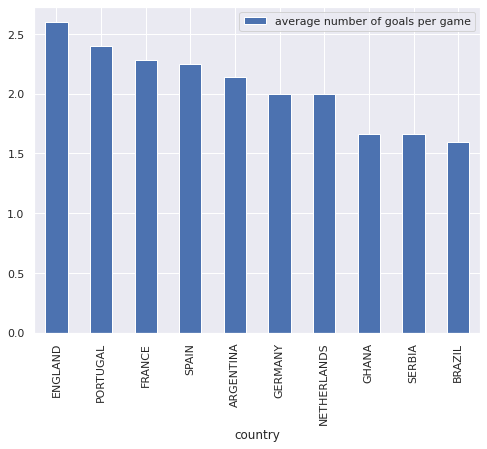

In [ ]:
top(result, "number of goals ", 10)

## Assists

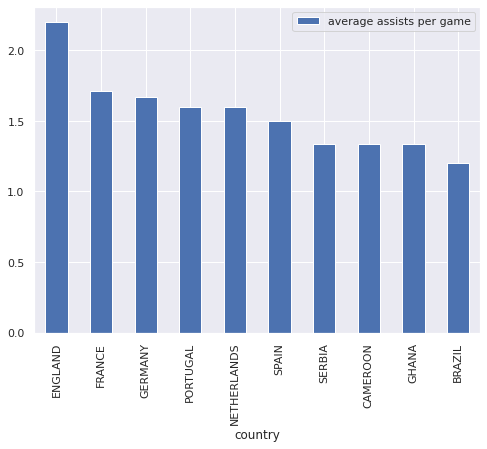

In [ ]:
top(result, "assists ", 10)

## Goal Inside the Penalty Area

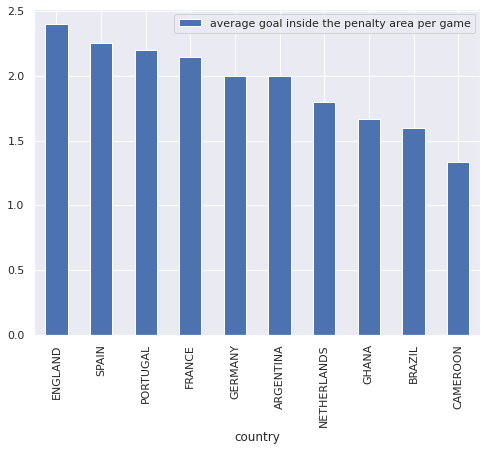

In [ ]:
top(result, "goal inside the penalty area ", 10)

## On target Attempts

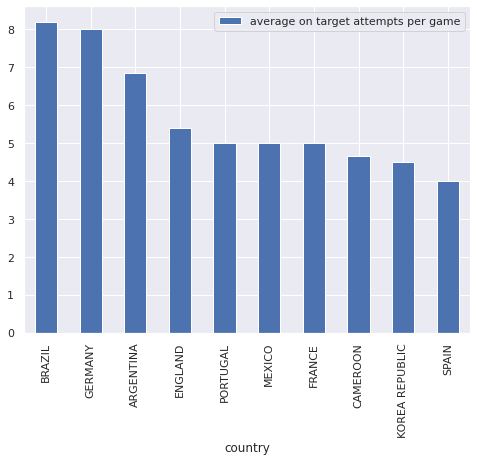

In [ ]:
top(result, "on target attempts ", 10)

## Attempts Inside the Penalty Area

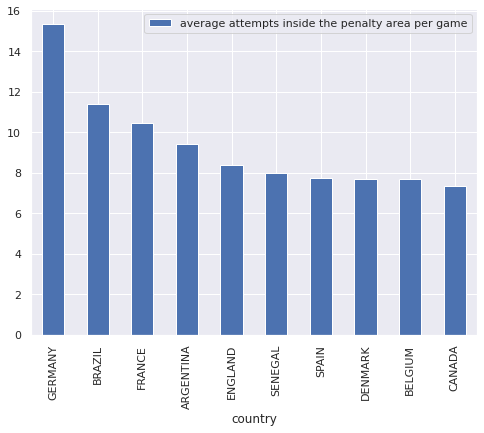

In [ ]:
top(result, "attempts inside the penalty area ", 10)

## Left inside Channel

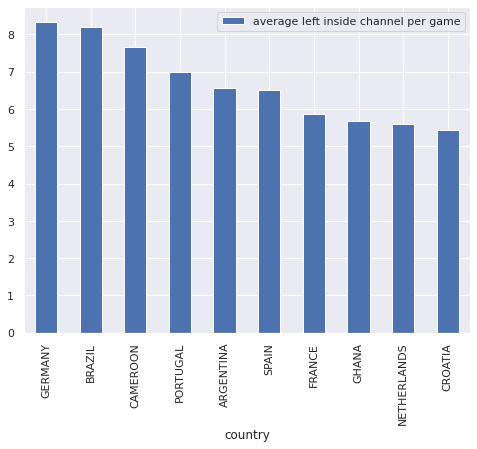

In [ ]:
top(result, "left inside channel ", 10)

## Total Attempts

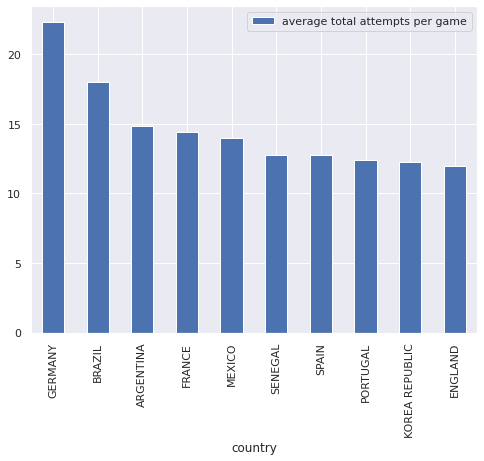

In [ ]:
top(result, "total attempts ", 10)

## Infront Offers to Receive

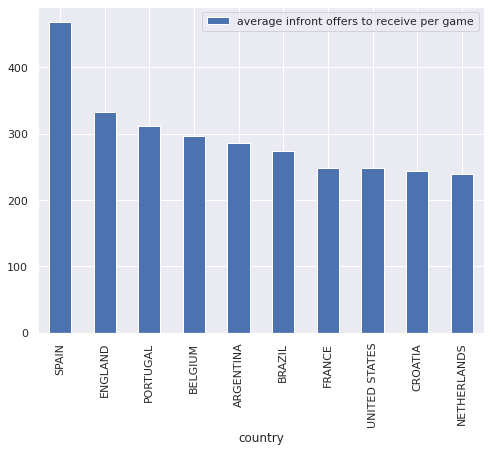

In [ ]:
top(result, "infront offers to receive ", 10)

## Corners

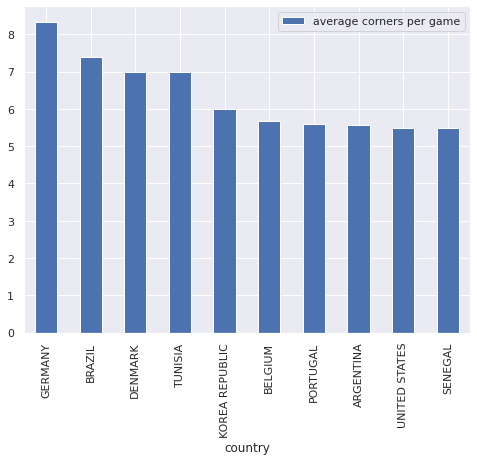

In [ ]:
top(result, "corners ", 10)

# Making New Columns

After making new columns, I will take a look at whether the rank of new columns follows the rank of each countries' soccer skills

In [ ]:
result["goals per shots "] = result["number of goals "] / result["total attempts "]
result["on target attempts per total attempts"] = result["on target attempts "] / result["total attempts "]
result["goals per on target attempts "] = result["number of goals "] / result["on target attempts "]
result["goals per shots_inside the penalty area "] = result["goal inside the penalty area "] / result["attempts inside the penalty area "]
result["long shots per total attempts "] = result["attempts outside the penalty area "] / result["total attempts "]

result["pass success rate "] = result["passes completed "] / result["passes "]
result["cross success rate "] = result["crosses completed "] / result["crosses "]

result["line break success rate "] = result["completed line breaks "] / result["attempted line breaks "]
result["defensive line break success rate "] = result["completed defensive line breaks "] / result["attempted defensive line breaks "]

result["non assisted goal ratio "] = 1 - (result["assists "] / result["number of goals "])
result["assisted goal ratio "] = result["assists "] / result["number of goals "]

total = result.loc[:, "left channel ": "right channel "].sum(axis = 1)
result["left channel ratio "] = result["left channel "] / total
result["left inside channel ratio "] = result["left inside channel "] / total
result["central channel ratio "] = result["central channel "] / total
result["right inside channel ratio "] = result["right inside channel "] / total
result["right channel ratio "] = result["right channel "] / total

result["inbehind offers to receive ratio"] = result["inbehind offers to receive "] / result["total offers to receive "]
result["inbetween offers to receive ratio"] = result["inbetween offers to receive "] / result["total offers to receive "]
result["infront offers to receive ratio"] = result["infront offers to receive "] / result["total offers to receive "]

## Goals vs Total Attempts vs On Target Attempts

goals per shots = number of goals / total attempts

on target attempts per total attempts = on target attempts / total attempts

goals per on target attempts = number of goals / on target attempts



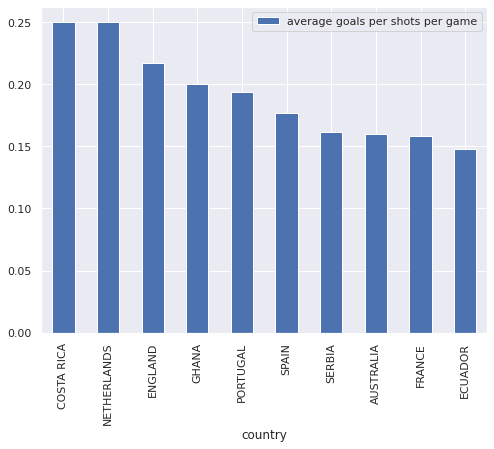

In [ ]:
top(result, "goals per shots ", 10)

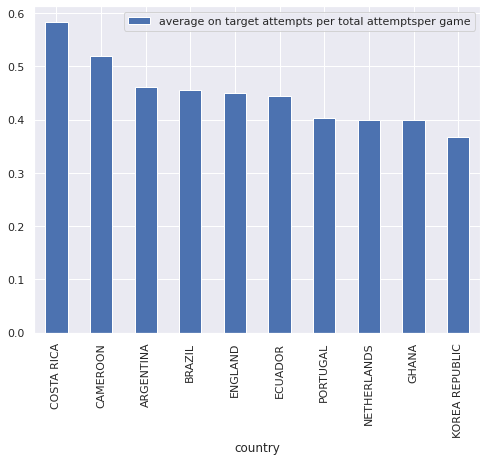

In [ ]:
top(result, "on target attempts per total attempts", 10)

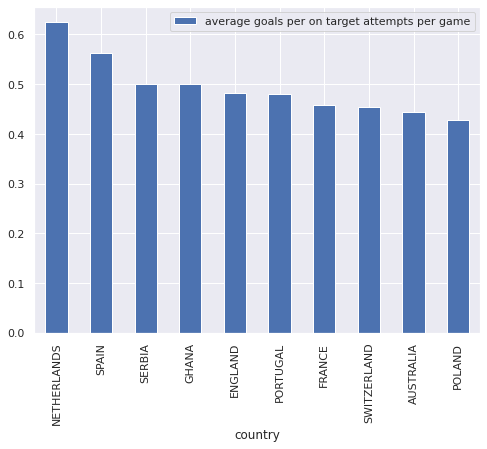

In [ ]:
top(result, "goals per on target attempts ", 10)

#I will draw a 3d visualized graph later with these columns

## Goals per Shots (Inside the Penalty Area)

goal inside the penalty area / attempts inside the penalty area

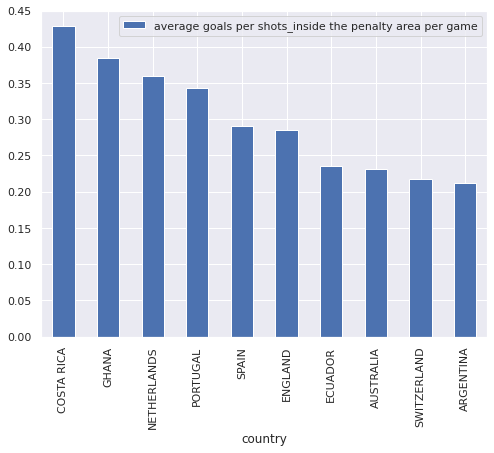

In [ ]:
top(result, "goals per shots_inside the penalty area ", 10)

#These countries showed a high concentration especially at significant situations inside the penalty area

## Long Shots per Total Attempts

attempts outside the penalty area / total attempts

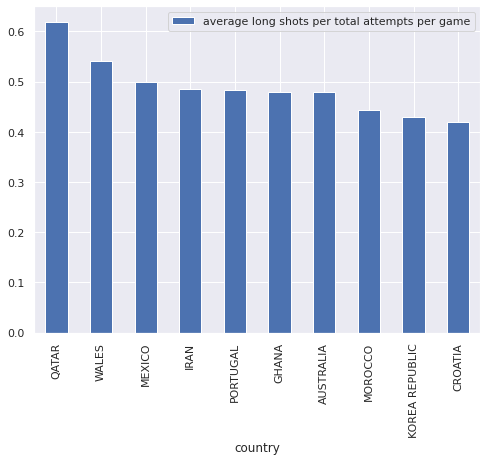

In [ ]:
top(result, "long shots per total attempts ", 10)

#I can interpret this that their strategy allowed some long shots
#However, it can also be interpreted that these countries were unable to break the opponent's solid defensive line 

## Pass Success Rate

passes completed / passes

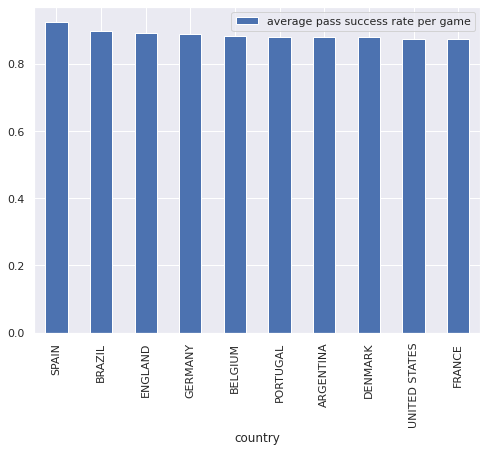

In [ ]:
top(result, "pass success rate ", 10)

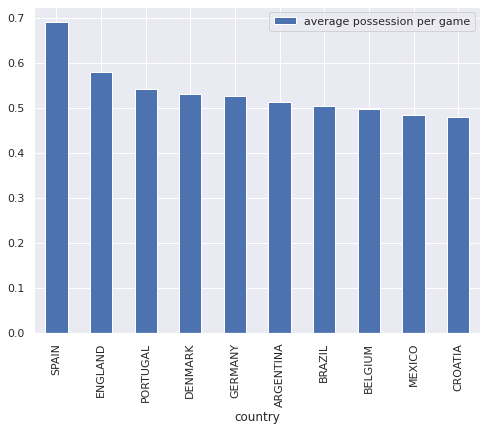

In [ ]:
# On this column, I also took a look at possession
top(result, "possession ", 10)

#Spain took the first place on both pass success rate and possession
#England, Brazil, Germany etc. also showed good scores on both columns
#These countries focused on build-up strategies, by maintaining high possession and pass success rates

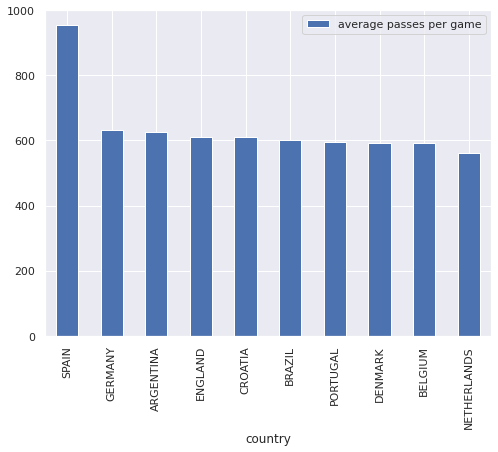

In [ ]:
top(result, "passes ", 10)

#As I take a look at number of passes, Spain showed outstanding performances

## Cross Success Rate

crosses completed / crosses

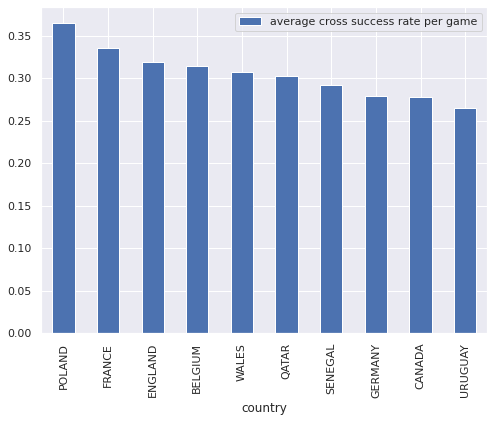

In [ ]:
top(result, "cross success rate ", 10)

#These countries showed high performances at long-range passes

## Line Break Success Rate

completed line breaks / attempted line breaks

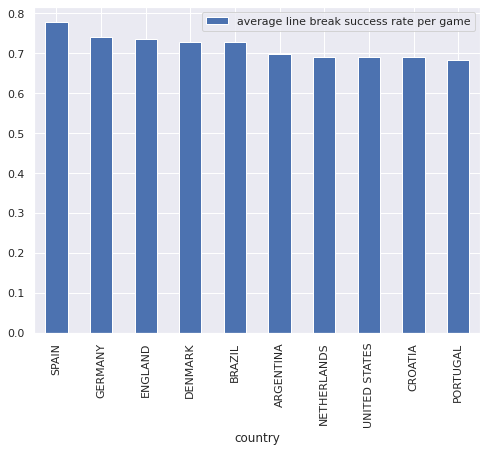

In [ ]:
top(result, "line break success rate ", 10)

#Spain taking the first place once again, meaning that they were highly organized team
#Germany, England, Brazil also showed great performances

## Defensive Line Break Success Rate

completed defensive line breaks / attempted defensive line breaks

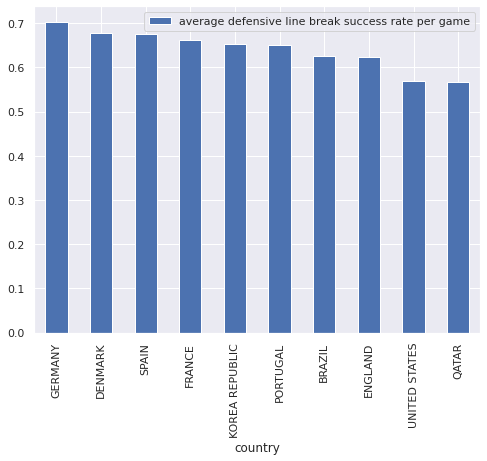

In [ ]:
top(result, "defensive line break success rate ", 10)

#Likewise, there are a number of countries with high football strategies and skill levels

## Non Assisted Goal Ratio

1 - (assists / number of goals)

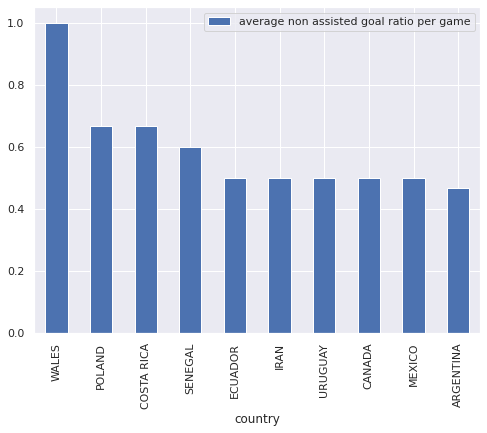

In [ ]:
top(result, "non assisted goal ratio ", 10)

## Assisted Goal Ratio

assists / number of goals

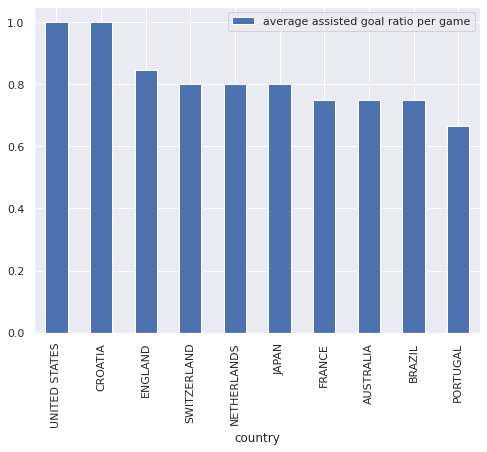

In [ ]:
top16 = category("Round of 16")[["team1","team2"]].values.reshape(16).tolist()
result2 = result[result.index.isin(top16)]  #This time I will use top 16 countries only (Qualified to round of 16)

top(result2, "assisted goal ratio ", 10)

## Channel Ratios

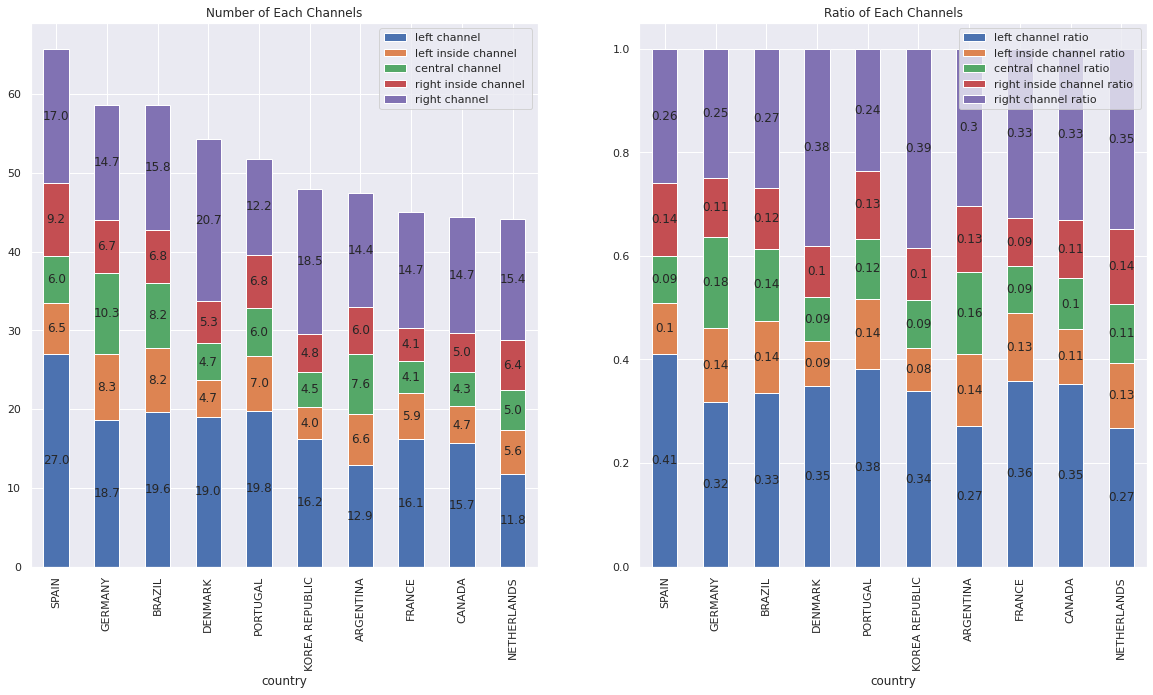

In [ ]:
ch = result.loc[:, "left channel ratio " : "right channel ratio "]
channel = pd.concat([total, result.loc[:, "left channel " : "right channel "], ch], axis = 1).sort_values(by = 0, ascending = False)

f, ax = plt.subplots(1, 2, figsize = (20,10))
g1 = channel.iloc[:10, 1:6].plot(kind = "bar", stacked = True, ax = ax[0])
g2 = channel.iloc[:10, 6:].plot(kind = "bar", stacked = True, ax = ax[1])

for c in g1.containers:
    labels = [np.round(x.get_height(), decimals = 1) for x in c]
    g1.bar_label(c, labels = labels, label_type = 'center')

for d in g2.containers:
  labels = [np.round(y.get_height(), decimals = 2) for y in d]
  g2.bar_label(d, labels = labels, label_type = 'center')

ax[0].set_title("Number of Each Channels")
ax[1].set_title("Ratio of Each Channels")

plt.show()

#Countries mostly used the sideways of the field

## Offers to Receive Ratios

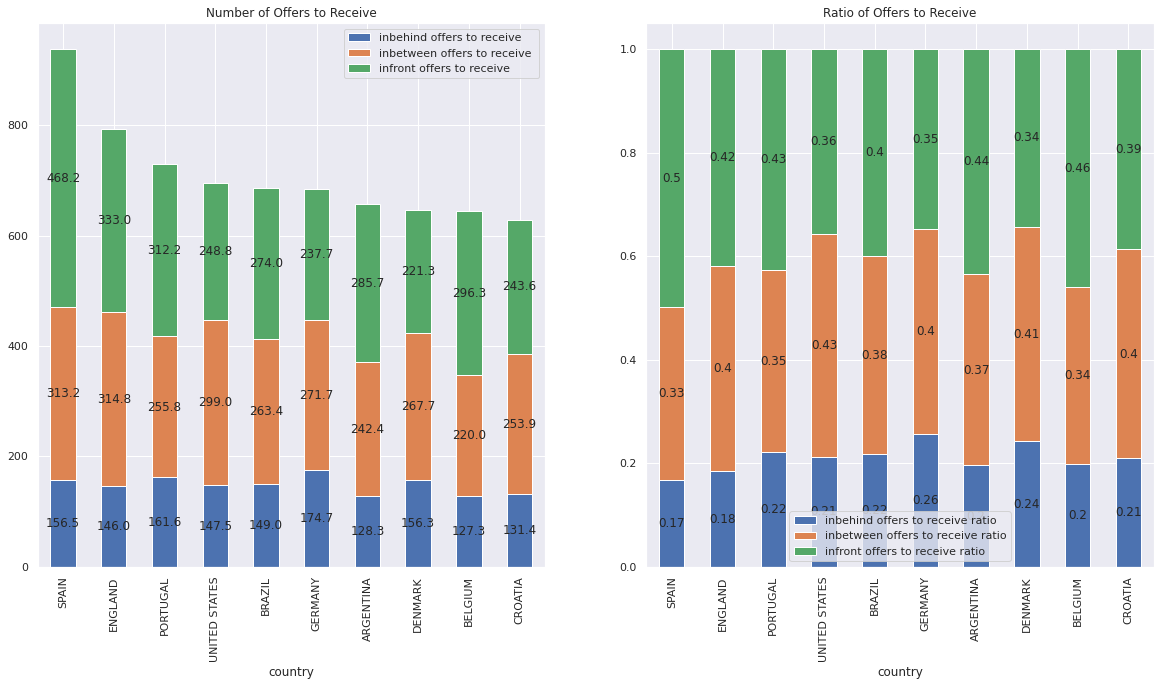

In [ ]:
offers = pd.concat([result.loc[:, "total offers to receive " : "infront offers to receive "], 
                    result.loc[:, "inbehind offers to receive ratio" : "infront offers to receive ratio"]], axis = 1
                   ).sort_values(by = "total offers to receive ", ascending = False)

f, ax = plt.subplots(1, 2, figsize = (20,10))
g1 = offers.iloc[:10, 1:4].plot(kind = "bar", stacked = True, ax = ax[0])
g2 = offers.iloc[:10, 4:].plot(kind = "bar", stacked = True, ax = ax[1])

for c in g1.containers:
    labels = [np.round(x.get_height(), decimals = 1) for x in c]
    g1.bar_label(c, labels = labels, label_type = 'center')

for d in g2.containers:
  labels = [np.round(y.get_height(), decimals = 2) for y in d]
  g2.bar_label(d, labels = labels, label_type = 'center')

ax[0].set_title("Number of Offers to Receive")
ax[1].set_title("Ratio of Offers to Receive")

plt.show()

# 3D Visualization & Correlation

## Goals vs Total Attempts vs On Target Attempts

In [ ]:
goals = result[["number of goals ", "on target attempts ", "total attempts "]]

goals.corr()

#No so much relationships

,number of goals,on target attempts,total attempts
number of goals,1.000000,0.598212,0.406846
on target attempts,0.598212,1.000000,0.850552
total attempts,0.406846,0.850552,1.000000


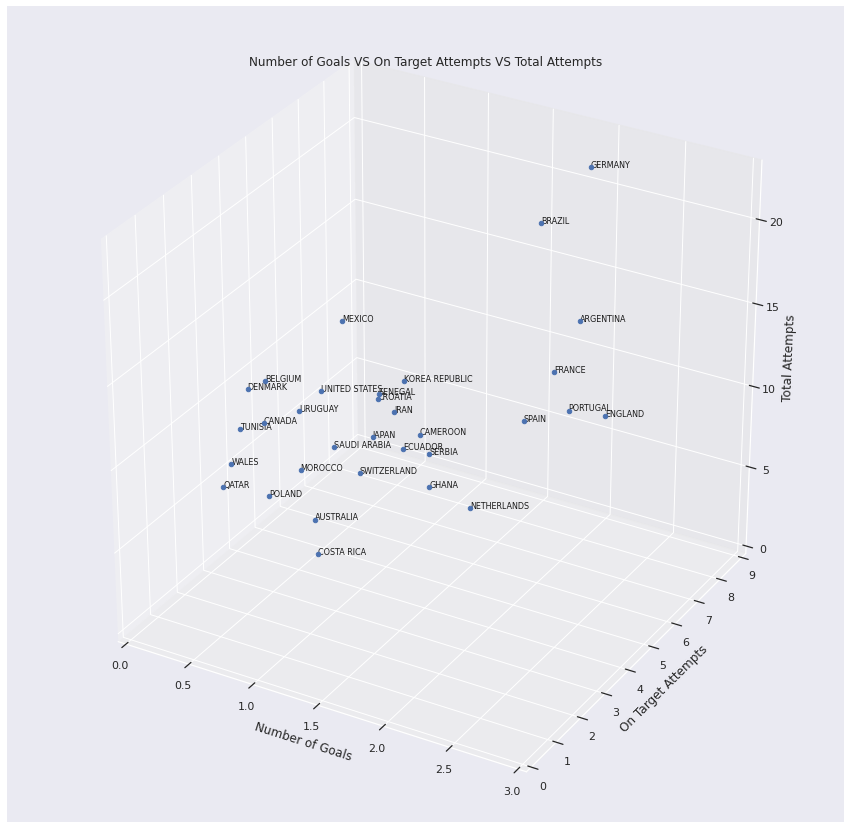

In [ ]:
xs = result["number of goals "]
ys = result["on target attempts "]
zs = result["total attempts "]
v = pd.DataFrame({"x" : xs,
                  "y" : ys,
                  "z" : zs}, index = result.index)

fig = plt.figure(figsize = (15,15))
ax = fig.gca(projection = "3d")

for i in range(len(v)):
    ax.scatter(v.iloc[i,0], v.iloc[i,1], v.iloc[i,2], color = 'b') 
    ax.text(v.iloc[i,0], v.iloc[i,1], v.iloc[i,2], v.index[i], size = 8, zorder = 1, color = 'k') 

ax.set_xlabel("Number of Goals") ; ax.set_xlim(0, np.ceil(np.max(xs)))
ax.set_ylabel("On Target Attempts") ; ax.set_ylim(0, np.ceil(np.max(ys)))
ax.set_zlabel("Total Attempts") ; ax.set_zlim(0, np.ceil(np.max(zs)))
ax.set_title("Number of Goals VS On Target Attempts VS Total Attempts")

plt.show()

## Correlation between pass, possession, line break

In [ ]:
poss = result[["pass success rate ", "possession ", "line break success rate "]]

poss.corr()

#Seems to be highly related to each other

,pass success rate,possession,line break success rate
pass success rate,1.000000,0.878484,0.952046
possession,0.878484,1.000000,0.862140
line break success rate,0.952046,0.862140,1.000000


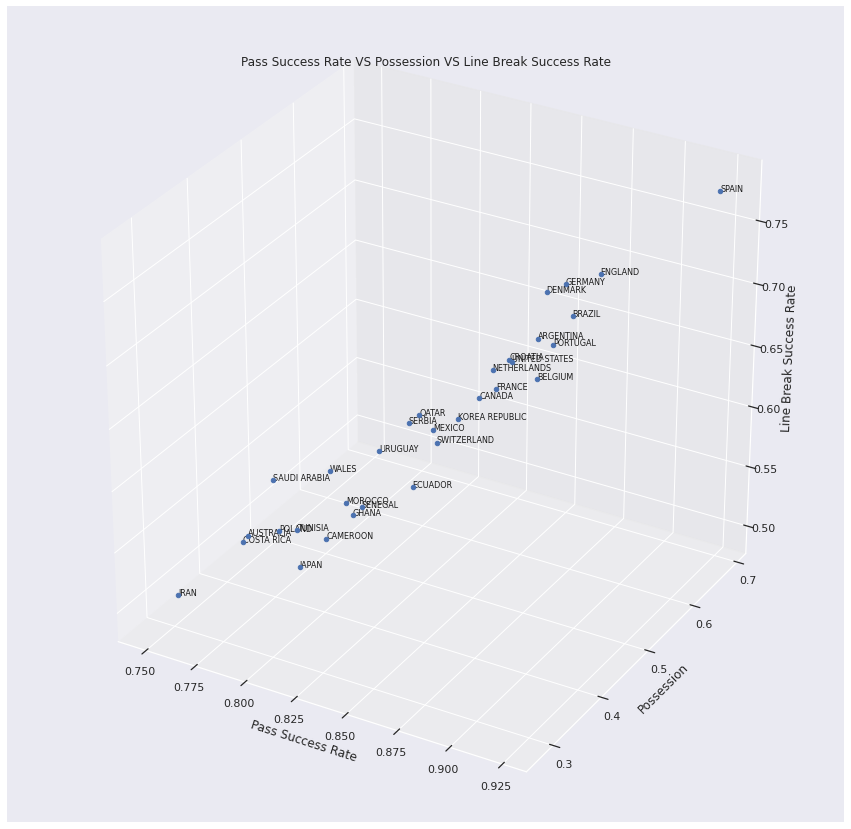

In [ ]:
xs = result["pass success rate "]
ys = result["possession "]
zs = result["line break success rate "]
v = pd.DataFrame({"x" : xs,
                  "y" : ys,
                  "z" : zs}, index = result.index)

fig = plt.figure(figsize = (15,15))
ax = fig.gca(projection = "3d")

for i in range(len(v)):
    ax.scatter(v.iloc[i,0], v.iloc[i,1], v.iloc[i,2], color = 'b') 
    ax.text(v.iloc[i,0], v.iloc[i,1], v.iloc[i,2], v.index[i], size = 8, zorder = 1, color = 'k') 

ax.set_xlabel("Pass Success Rate") ; #ax.set_xlim(0, 1)
ax.set_ylabel("Possession") ; #ax.set_ylim(0, 1)
ax.set_zlabel("Line Break Success Rate") ; #ax.set_zlim(0, 1)
ax.set_title("Pass Success Rate VS Possession VS Line Break Success Rate")

plt.show()

In [ ]:
result.corr().loc["result "][["possession ", "pass success rate ", "line break success rate "]]

#But these values and the result of the game does not seem related to much

possession                  0.210894
pass success rate           0.312572
line break success rate     0.216145
Name: result , dtype: float64